<a href="https://colab.research.google.com/github/Vixuz144/Simulacion-1/blob/main/Notas_de_Figols.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
from numba import jit
import scipy.stats as ss

# Calculo de Pi


In [ ]:
def calculo_de_pi(N, m):
  intentos = N//m
  a = np.random.random((2,N))

  v = a[0]**2 + a[1]**2 <= np.ones(N)
  c = v.tolist().count(True)

  c2 = np.array([])
  for i in range(m,N+1,m):
    b = a[0,:i]**2 + a[1,:i]**2 <= np.ones(i)
    c2 = np.append(c2,4*(b.tolist().count(True))/i)

  #plt.plot(range(intentos),c2)
  return 4*c/N, c2

In [ ]:
@jit(nopython = True)
def calculo_rc2(N, p = 1):
  c = 0
  c2 = []
  for i in range(1, N+1):
    x = random()
    y = np.pi/4 * random()
    if x <= np.cos(y):
      c+=1

    if i%p == 0:
      c2.append(c/i)
  c2 = np.array(c2) * np.pi/4
  return np.pi/4 * c/N, c2

In [ ]:
def aprox_v(N):
  a = np.random.random((3,N))

  v = a[0]**2 + a[1]**2 + a[2]**2 <= np.ones(N)
  c = v.tolist().count(True)

  return 8*c/N

In [ ]:
@jit(nopython = True)
def volados(N=10000000, A = 3, B = 12):
  ca, cb = 0, 0
  cv = []
  for i in range(N):
    a, b = A, B
    c = 0
    while a != 0  and b != 0:
      r = random()
      c +=1
      if r <= 0.5:
        a += 1
        b -= 1
      else:
        a -= 1
        b += 1

    if a == 0:
      cb+=1
    if b == 0:
      ca+=1

    cv.append(c)
  return ca/N, cb/N, np.mean(np.array(cv))

3.15056
1.4110537589155607
Nuestra apriximación de pi es 3.144101546414494



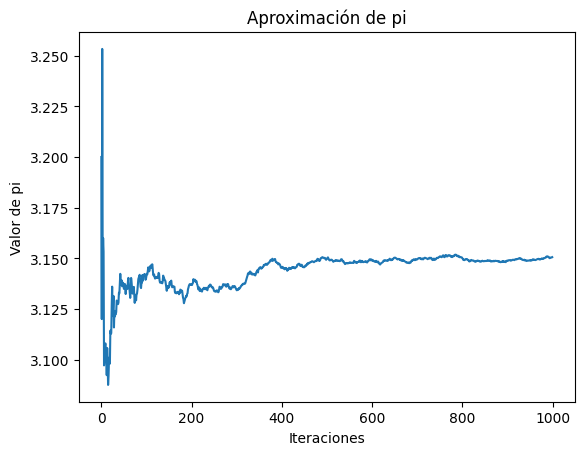

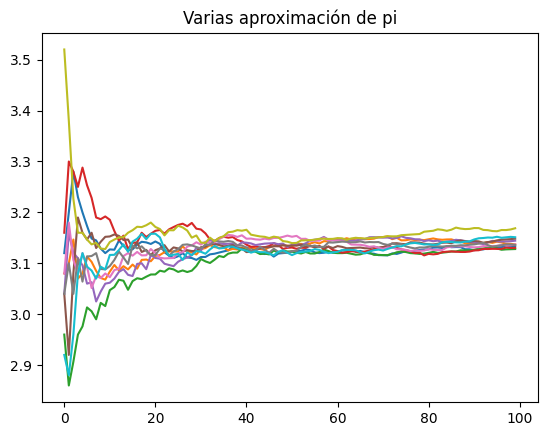

El valor de 1/sqrt(2) = 0.7071505151744872
El valor de sqrt(2) =1.4141260998067053



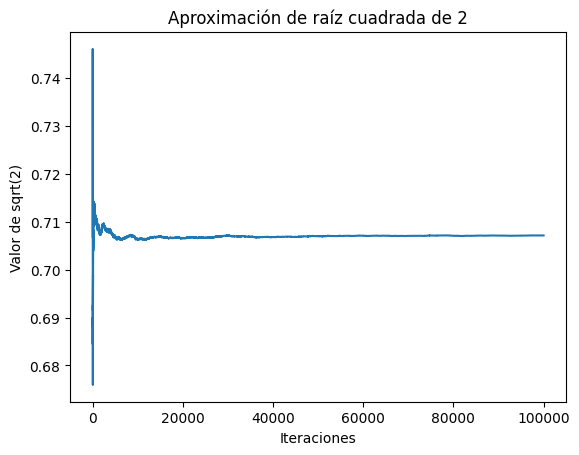

Valor aproximado del volumen de una esfera4.22856
Valor "exacto" del volumen de una esfera 4.1887902047863905
Probabilidad de que el jugador A gane: 0.1999749
Probabilidad de que el jugador B gane: 0.8000251
Valor esperado de número de volados: 36.0105769
Ganancia esperada del jugador A: -0.0003764999999997798
Ganancia esperada del jugador B: 0.00037650000000066797


In [ ]:
if __name__ == '__main__':
  pi, iter = calculo_de_pi(100000,100)
  print(pi)
  print(1/np.sin(pi/4))
  print(f"Nuestra apriximación de pi es {np.mean(iter)}\n")

  plt.plot(iter)
  plt.title('Aproximación de pi')
  plt.xlabel('Iteraciones')
  plt.ylabel('Valor de pi')
  plt.show()

  plt.figure()
  for i in range(10):
    pi, iter = calculo_de_pi(10000,100)
    plt.plot(iter)
    plt.title('Varias aproximación de pi')
  plt.show()

  drc2, iter2 = calculo_rc2(1000000, 10)
  rc2 = 1/drc2
  print(f"El valor de 1/sqrt(2) = {drc2}\nEl valor de sqrt(2) ={rc2}\n")

  plt.figure()
  plt.plot(iter2)
  plt.title('Aproximación de raíz cuadrada de 2')
  plt.xlabel('Iteraciones')
  plt.ylabel('Valor de sqrt(2)')
  plt.show()

  v = aprox_v(100000)
  print(f"Valor aproximado del volumen de una esfera{v}")
  print(f'Valor "exacto" del volumen de una esfera {np.pi * 4/3}')

  ej_vol = volados()
  print(f'Probabilidad de que el jugador A gane: {ej_vol[0]}')
  print(f'Probabilidad de que el jugador B gane: {ej_vol[1]}')
  print(f'Valor esperado de número de volados: {ej_vol[2]}')
  print(f'Ganancia esperada del jugador A: {ej_vol[0] * 12 + (1-ej_vol[0]) * -3}')
  print(f'Ganancia esperada del jugador B: {ej_vol[1] * 3 + (1-ej_vol[1]) * -12}')

#Generador de Números Aleatorios

In [ ]:
if __name__ == "__main__":
  x = 673
  n = 5
  for i in range(n):
    y = str(x**2)
    l = len(y)

    if l%2 == 1:
      y = "0" + y
      l = len(y)

    c  = int(l/2)
    x = int(y[c-1 : c+1])

    print(x)


  a = 51
  c = 23
  m = 57
  x = 32

  l = []
  for i in range(m):
    x = (a*x+c)%m
    l.append(x)

  s=set(l)
  print()
  print(s)
  print(len(s))

  s01 = np.array(list(s))/(m-1)
  print(s01)



29
84
5
25
62

{32, 2, 35, 5, 38, 8, 41, 11, 14, 47, 17, 50, 20, 53, 23, 56, 26, 29}
18
[0.57142857 0.03571429 0.625      0.08928571 0.67857143 0.14285714
 0.73214286 0.19642857 0.25       0.83928571 0.30357143 0.89285714
 0.35714286 0.94642857 0.41071429 1.         0.46428571 0.51785714]


#Pruebas de aleatoriedad

In [ ]:
import matplotlib.pyplot as pl
import numpy as np

In [ ]:
def GNA_CMed(seed, l = 8, n = 144):
  x = seed
  lista = []

  m = round(l/4)

  for i in range(n):
    y = str(x**2)
    while len(y) < l:
      y = "0" + y
    x = int(y[m:-m])
    lista.append(x)

  return x, lista

In [ ]:
def GNA_CMod(seed, a, c, m, n = 144):
  x = seed
  l = []
  for i in range(n):
    x = (a*x+c)%m
    l.append(x)
  return x, l

In [ ]:
def chi_sqr(lista_na, n, alpha = 0.95):
  na = np.array(lista_na)
  N = len(na)

  a, b = 0, 1
  p = (b-a)/n
  c = a + p

  cuenta = []
  for i in range(n):
    cosa1 = a<=na
    cosa2 = na<c
    cosa = list(cosa1 == cosa2)
    # print(cosa1, cosa2, cosa)

    cuenta.append(cosa.count(True))
    a = c
    c = a + p

  frec_r = np.array(cuenta)
  frec_i = N/n * np.ones(n)

  # print(frec_r, frec_i)
  est_p = np.sum((frec_r - frec_i)**2 / frec_i)
  est_crit = ss.chi2.ppf(alpha, n-1)
  if est_p < est_crit:
    t = "No rechazo, distro uniforme"
  else:
    t = "Rechazo, distro no uniforme"
  return est_p, est_crit, t

In [ ]:
def prueba_ks(lista_na, n):
  na = np.sort(np.array(lista_na))
  N = len(na)

  a, b = 0, 1
  p = (b-a)/n
  x = a + p

  cuenta = []
  for i in range(n):
    cuenta.append(list(na<=x).count(True))
    x += p

  frec = np.array(cuenta)

  u = []
  for i in range(n+1):
    u.append(i/n)
  u = np.array(u)

  D1 = max(u[1:] - frec)
  D2 = max(frec - u[:n])

  D = max(D1, D2)
  return D

In [ ]:
if __name__ == "__main__":
  x = 452
  m = 10000
  y,l = GNA_CMed(x, n = m)

  l = np.array(l)/10000

  #print(set(list(l)))
  #pl.scatter(l[:m], l[1:])

  #pl.figure()
  #pl.plot(np.sort(l))

  print(chi_sqr(l,10))

  print(prueba_ks(l, 10))


  a=48
  c=23
  m=47
  x0=32
  n = 10000

  x, l = GNA_CMod(x0, a, c, m, n)

  print(chi_sqr(l,10))

  print(prueba_ks(l, 10))


  m=231
  a=1103515245
  c=12345
  x0=743871

  x, l = GNA_CMod(x0, a, c, m, n)

  print(chi_sqr(l,10))

  print(prueba_ks(l, 10))



(14825.542000000001, 16.918977604620448, 'Rechazo, distro no uniforme')
9999.1
(9619.369, 16.918977604620448, 'Rechazo, distro no uniforme')
213.0
(10000.0, 16.918977604620448, 'Rechazo, distro no uniforme')
1.0


#Evaluación de integrales

In [ ]:
from random import random
from math import exp, sqrt
n=1000000
suma=0
for i in range(n):
    x=random()
    suma=suma+(1/(1+x**2))
print(4*suma/n)
#Da pi
suma2=0
for i in range(n):
    z=random()
    suma2=suma2+((sqrt((1/z)-1))*(exp((-1/z)+1)))/z*2
print(suma2/n)
#Da 0.88
suma3=0
for i in range(n):
    y=random()
    suma3=suma3+ exp(-(2*y +3)**2)
print(2*suma3/n)
#Da 1.95x10**-5
suma4=0
for i in range(n):
    d=random()
    suma4=suma4+((exp(-((3/d)-1)*2))/d*2)
print(3*suma4/n)

suma5=0
for i in range(n):
    k=random()
    suma5=suma5+ (sqrt((1+ ((1/k) -1)*4)))/k*2
print(suma5/n)
#Da 0.00415

3.140885419151562
0.858319313054176
1.9520506934393513e-05
0.015970863698906435
21170.56330981733


In [ ]:
@jit(nopython = True)
def ej7a(n = 100000, rep = 1000):
  l = []
  for j in range(rep):
    integ = []
    for i in range(n):
      r = random()
      integ.append(1/(1+r**2)) #funcion
    integ = np.array(integ)
    l.append(integ.mean())
  return l

In [ ]:
@jit(nopython = True)
def ej7b(n = 100000, rep = 1000):
  l = []
  for j in range(rep):
    integ = []
    for i in range(n):
      r = random()
      integ.append(np.sqrt(1 - r**2)) #funcion
    integ = np.array(integ)
    l.append(integ.mean())
  return l

In [ ]:
@jit(nopython = True)
def ej8(n = 100000, rep = 1000):
  l = []
  for j in range(rep):
    integ = []
    for i in range(n):
      r = 2 + random()
      integ.append(1/(1+r)) #funcion
    integ = np.array(integ)
    l.append(integ.mean())
  return l

In [ ]:
if __name__ == '__main__':
  l1 = np.array(ej7a())
  l2 = np.array(ej7b())
  l3 = np.array(ej8())
  print(l1.mean(), l1.var(ddof = 1))
  print(l2.mean(), l2.var(ddof = 1))
  print(l3.mean(), l3.var(ddof = 1))

0.7854174095749276 2.5363977332572113e-07
0.7853929573473982 4.795369810162778e-07
0.2876869634753097 6.1646288824761615e-09


In [ ]:
@jit(nopython = True)
def ej10(n = 10000, rep = 1000):
  l = []
  for j in range(rep):
    p = 0
    for k in range(50):
      ig = []
      for i in range(n):
        r = k + random()
        ig.append(np.exp(-r**2))
      p += np.array(ig).mean()
    l.append(p)
  return l

In [ ]:
@jit(nopython = True)
def ej11(n = 10000, rep = 1000):
  l = []
  for j in range(rep):
    p = 0
    for k in range(50):
      ig = []
      for i in range(n):
        x = k + random()
        y = k + random()
        ig.append(np.exp(-(x**2 + y**2)))
      p += np.array(ig).mean()
    l.append(p)
  return l

In [ ]:
if __name__ == '__main__':
  n = 1000
  l4 = np.array(ej10(rep = n))
  l5 = np.array(ej11(rep = n))
  z = ss.norm.ppf(0.95)

  med = l4.mean()
  desv = l4.std(ddof = 1)
  print(f"Intervalo de confianza al 90%: [{med - z * desv /np.sqrt(n)}, {med + z * desv /np.sqrt(n)}]")

  med = l5.mean()
  desv = l5.std(ddof = 1)
  print(f"Intervalo de confianza al 90%: [{med - z * desv /np.sqrt(n)}, {med + z * desv /np.sqrt(n)}]")


Intervalo de confianza al 90%: [0.8862159438554743, 0.886448155748872]
Intervalo de confianza al 90%: [0.5758619083171609, 0.5760867555533188]


#Generación de variables aleatorias discretas

In [ ]:
@jit(nopython = True)
def ej12():
  x = [1, 5, 3]
  p = [0.3, 0.2, 0.5]

  i = 0
  suma = p[i]
  r = random()
  while suma < r:
    i += 1
    suma += p[i]
  return x[i]

In [ ]:
n =100
lr = []
for i in range(n):
  lr.append(ej12())

print(lr)
print(f'Hay {lr.count(1)} repeticiones de 1')
print(f'Hay {lr.count(5)} repeticiones de 5')
print(f'Hay {lr.count(3)} repeticiones de 3')

[3, 1, 3, 3, 1, 1, 5, 3, 3, 5, 3, 1, 5, 1, 3, 1, 3, 5, 3, 1, 3, 5, 3, 5, 3, 5, 3, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 5, 1, 5, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 5, 5, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 5, 5, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 5, 1, 1, 3, 3, 3]
Hay 30 repeticiones de 1
Hay 16 repeticiones de 5
Hay 54 repeticiones de 3


#Generación de números aleatorios Distro Binomial

In [ ]:
@jit(nopython = True)
def bino(n,p):
  r = random()
  pb = (1-p)**n
  suma = pb
  k = 0
  while r > suma:
    pb = ((n-k)/(k+1))*p*pb/(1-p)
    suma = suma + pb
    k += 1
  return k

In [ ]:
if __name__ == "__main__":
  rep = 1000000
  p = 0.75
  n = 7

  l = []
  for i in range(rep):
    l.append(bino(n,p))
  med = np.mean(l)
  var = np.var(l, ddof = 1)

  print(f"Media estimada: {med}")
  print(f"Varianza estimada: {var}")

  print(f"Media np = {n*p}")
  print(f"Varianza np(1+p) = {n*p*(1-p)}")

Media estimada: 5.25087
Varianza estimada: 1.3101035532035528
Media np = 5.25
Varianza np(1+p) = 1.3125


#Generación de números aleatorios Distro Poisson

In [ ]:
@jit(nopython = True)
def poisson(l):
  r = random()
  pk = exp(-l)
  s = pk
  k=0
  while s<r:
    pk = l*pk/(k+1)
    s += pk
    k += 1
  return k

In [ ]:
if __name__ == "__main__":
  n= 1000000
  lam = 5
  l = []
  for i in range(n):
    l.append(poisson(lam))
  med = np.mean(l)
  var = np.var(l, ddof = 1)

  print(f"Media estimada: {med}")
  print(f"Varianza estimada: {var}")

  print(f"Media: lambda = {lam}")
  print(f"Varianza: lambda = {lam}")

Media estimada: 4.999882
Varianza estimada: 4.99336097943698
Media: lambda = 5
Varianza: lambda = 5


#Generación de números aleatorios con Distro Geométrica

In [ ]:
@jit(nopython = True)
def geo(p):
  r = random()
  return int(np.log(1-r)/np.log(1-p)) + 1

In [ ]:
if __name__ == '__main__':
  n = 1000000
  p = 0.25
  l = []
  for i in range(n):
    l.append(geo(p))
  med = np.mean(l)
  var = np.var(l, ddof = 1)

  print(f"Media estimada: {med}")
  print(f"Varianza estimada: {var}")

  print(f"Media: 1/p = {1/p}")
  print(f"Varianza: (1-p)/p^2 = {(1 - p)/p**2}")

Media estimada: 4.000109
Varianza estimada: 12.010886999005992
Media: 1/p = 4.0
Varianza: (1-p)/p^2 = 12.0


#Ya no sé que

In [ ]:
def ej16(n = 1000000):
  l1, l2 = [], []
  for i in range(n):
    r = random()
    k = int(-np.log(1-r)/np.log(5)) + 1
    l1.append(k)
    l2.append(np.sqrt(k))
  return np.array(l1), np.array(l2)

In [ ]:
if __name__ == '__main__':
  l16a, l16b = ej16(100000)

  med = np.mean(l16a)
  var = np.var(l16a, ddof = 1)

  print(f"Media estimada: {med}")
  print(f"Varianza estimada: {var}")

  med = np.mean(l16b)
  var = np.var(l16b, ddof = 1)

  print(f"Media estimada: {med}")
  print(f"Varianza estimada: {var}")

Media estimada: 1.25167
Varianza estimada: 0.3133353444534446
Media estimada: 1.098841919898456
Varianza estimada: 0.044216877242647515


In [ ]:
@jit(nopython = True)
def ej17(rep = 1000000):
  l = []
  for i in range(rep):
    suma = 0
    n = 0
    while suma <= 1:
      suma +=random()
      n += 1
    l.append(n)
  return np.array(l)

In [ ]:
l17 = ej17()

med = l17.mean()
var = l17.var(ddof = 1)
print(f"Media (Valor esperado) : {med}")
print(f'Varianza : {var}')

Media (Valor esperado) : 2.719196
Varianza : 0.7668518804358804


#Método de la Transformada Inversa

In [ ]:
@jit(nopython = True)
def ej18(n = 1000000):
  l = list()
  for i in range(n):
    r = random()
    z = np.cbrt(r)
    l.append(z)
  return np.array(l)

Media estimada: 0.749988199227485
Varianza estimada: 0.037501205285011725


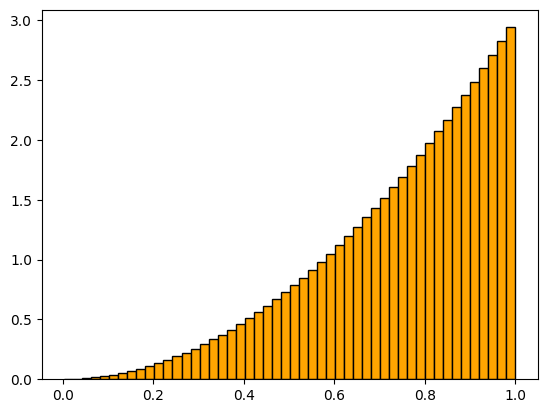

Media estimada: -0.33335510027300147
Varianza estimada: 0.11112967280399169


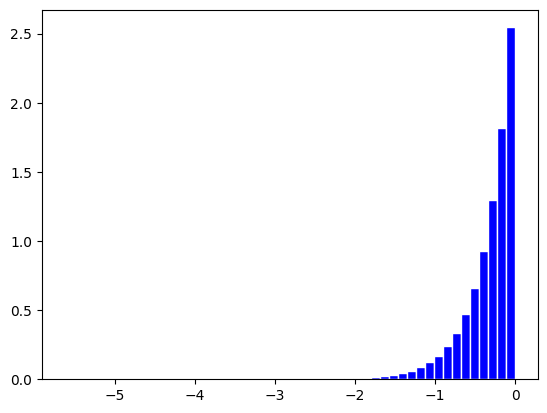

In [ ]:
if __name__ == "__main__":
  l18 = ej18(10**8)

  med = np.mean(l18)
  var = np.var(l18, ddof = 1)

  print(f"Media estimada: {med}")
  print(f"Varianza estimada: {var}")

  plt.hist(l18, bins = 50, density = True, color = "orange", edgecolor = "black")
  plt.show()

  llog = np.log(l18)

  med = np.mean(llog)
  var = np.var(llog, ddof = 1)

  print(f"Media estimada: {med}")
  print(f"Varianza estimada: {var}")

  plt.figure()
  plt.hist(llog, bins = 50, density = True, color = "blue", edgecolor = "white")
  plt.show()

In [ ]:
@jit(nopython = True)
def ej19(lam, n = 100000):
  l = []
  for i in range(n):
    r = random()
    l.append(-np.log(1-r)/lam)
  return np.array(l)

Media estimada: 1.9993725749502398
Varianza estimada: 3.999894567744346


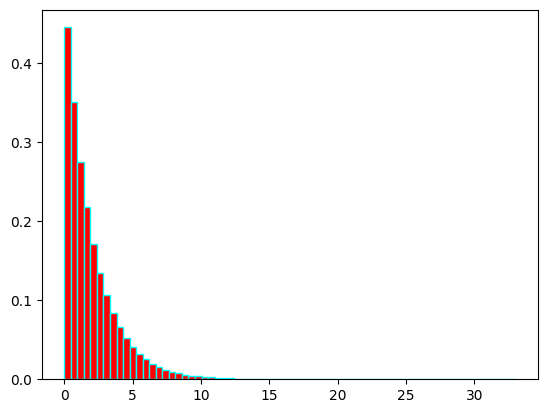

Media estimada: 1.2530428858147913
Varianza estimada: 0.4292561441847962


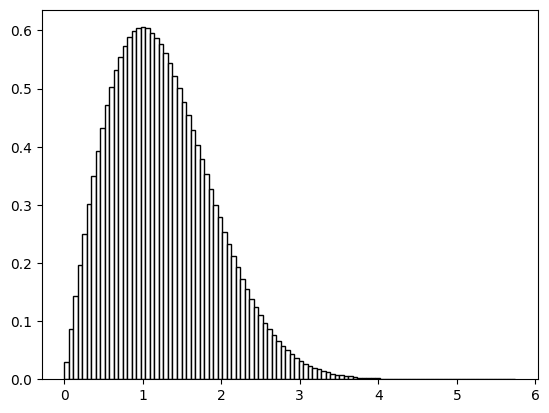

In [ ]:
if __name__ == '__main__':
  l19 = ej19(0.5, 10**7)
  med = l19.mean()
  var = l19.var(ddof = 1)

  print(f"Media estimada: {med}")
  print(f"Varianza estimada: {var}")

  plt.hist(l19, bins = 69, density = True, color = "red", edgecolor = "cyan")
  plt.show()

  lrc = np.sqrt(l19)

  med = lrc.mean()
  var = lrc.var(ddof = 1)

  print(f"Media estimada: {med}")
  print(f"Varianza estimada: {var}")

  plt.figure()
  plt.hist(lrc, bins = 100, density = True, color = "w", edgecolor = "k")
  plt.show()

#Ya me cansé, pero esto será lo último que haré

In [ ]:
@jit(nopython = True)
def ej20(n = 1000000):
  l = []
  c = 0
  for p in range(50, 101, 10):
    u = []
    for i in range(n):
      v = poisson(70)
      if p <= v:
        b = 3 * p
      else:
        b = 10*v + 5*abs(p-v) - 7*p
      u.append(b)
      if p == 70 and b<116:
        c += 1
    l.append(np.array(u).mean())
  return l, c/n

print(ej20()[0])
print(ej20()[1])

[149.928335, 177.83936, 193.36485, 187.45527, 169.892235, 149.9976]
0.010615


#Lineas de espera

In [ ]:
@jit(nopython = True)
def le_1s(T, ll, ls):
  t, i = 0, 0

  lista_tiempos = [t]
  lista_individuos = [i]

  tl = 0
  ts = np.inf
  t = min(tl,ts)

  while min(tl,ts) < T:
    if t == tl: #Llegada
      i += 1
      tl = t - np.log(random())/ll
      if i == 1: #si es el primer cliente
        ts = t - np.log(random())/ls
    else: #Salida
      i -= 1
      if t == 0: #Se vacia
        ts = np.inf
      else:
        ts = t - np.log(random())/ls

    t = min(tl,ts)
    lista_tiempos.append(t)
    lista_individuos.append(i)
  return np.array(lista_tiempos[:-1]), np.array(lista_individuos[:-1])

In [ ]:
ll = 2
ls = 1.8
T = 60
lt, li = le_1s(T, ll, ls)
print(np.append(np.array([lt]), np.array([li]), 0).transpose())

[[ 0.          0.        ]
 [ 0.57601102  1.        ]
 [ 1.00207227  2.        ]
 [ 1.0168711   3.        ]
 [ 1.53819439  2.        ]
 [ 2.13663251  1.        ]
 [ 2.15321437  2.        ]
 [ 2.2183163   3.        ]
 [ 2.88025173  2.        ]
 [ 4.00093614  3.        ]
 [ 4.27331019  4.        ]
 [ 4.48782768  3.        ]
 [ 4.73061972  4.        ]
 [ 4.95022632  3.        ]
 [ 5.25312092  2.        ]
 [ 5.51982148  3.        ]
 [ 6.24207847  4.        ]
 [ 6.34932955  3.        ]
 [ 7.26307535  2.        ]
 [ 7.29735857  3.        ]
 [ 7.62568384  4.        ]
 [ 7.9165953   3.        ]
 [ 8.31255961  4.        ]
 [ 8.50078869  3.        ]
 [ 8.64635451  4.        ]
 [ 9.42407204  3.        ]
 [ 9.83735203  2.        ]
 [ 9.85795499  3.        ]
 [ 9.89111765  2.        ]
 [10.1931764   3.        ]
 [10.24071314  2.        ]
 [10.91882625  1.        ]
 [11.46782234  0.        ]
 [11.78480277  1.        ]
 [12.00957681  0.        ]
 [12.09793431  1.        ]
 [12.49822873  2.        ]
 

In [ ]:
@jit(nopython =True)
def ej21a(n = 10**6):
  mi = []

  for i in range(n):
    lt, li = le_1s(T, ll, ls)
    mi.append(li.mean())
  mi = np.array(mi)
  return mi.mean()

In [ ]:
print(ej21a())

6.951630642852595


In [ ]:
@jit(nopython = True)
def ej21b(T, ll, ls):
  t, i = 0, 0

  lista_maximos = []

  tl = 0
  ts = np.inf
  t = min(tl,ts)

  while min(tl,ts) < T:
    ia= i
    if t == tl: #Llegada
      i += 1
      tl = t - np.log(random())/ll
      if i == 1: #si es el primer cliente
        ts = t - np.log(random())/ls
    else: #Salida
      i -= 1
      if t == 0: #Se vacia
        ts = np.inf
      else:
        ts = t - np.log(random())/ls
    t = min(tl,ts)

    lista_maximos.append(max(i,ia))
  return np.array(lista_maximos)

In [ ]:
@jit(nopython=True)
def ej21b_ciclo(n = 10**6):
  l = []

  for i in range(n):
    l.append(ej21b(T,ll, ls).mean())
  l = np.array(l)
  return l.mean()

In [ ]:
print(ej21b_ciclo(100000))

7.434473757006907


In [ ]:
@jit(nopython = True)
def ej21c(T, ll, ls, n = 10**6):
  l = []
  for i in range(n):
    t, i = 0, 0

    tl = 0
    ts = np.inf
    t = min(tl,ts)

    while min(tl,ts) < T:
      ia = i
      if t == tl: #Llegada
        i += 1
        tl = t - np.log(random())/ll
        if i == 1: #si es el primer cliente
          ts = t - np.log(random())/ls
      else: #Salida
        i -= 1
        if t == 0: #Se vacia
          ts = np.inf
        else:
          ts = t - np.log(random())/ls
      t = min(tl,ts)

    l.append(ia)
  l = np.array(l)
  return l.mean()

In [ ]:
print(ej21c(T, ll, ls, n = 10**5))

13.01036


In [ ]:
@jit(nopython = True)
def ej21d(T, ll, ls, n = 10**5):
  l = []
  for i in range(n):
    t, i = 0, 0

    tl = 0
    ts = np.inf
    t = min(tl,ts)

    while i < 10:
      if t == tl: #Llegada
        i += 1
        tl = t - np.log(random())/ll
        if i == 1: #si es el primer cliente
          ts = t - np.log(random())/ls
      else: #Salida
        i -= 1
        if t == 0: #Se vacia
          ts = np.inf
        else:
          ts = t - np.log(random())/ls
      t = min(tl,ts)

    l.append(t)
  l = np.array(l)
  return l.mean()

In [ ]:
print(ej21d(T, ll, ls))

45.10704939822195


In [ ]:
# @jit(nopython = True)
def le_ns(T,ll,ls, N = 10**5):
  lm = []
  for i in range(N):
    n = len(list(ls))
    t = 0
    i = 0

    l_t = [t]
    l_i = [i]
    l_k = [0]
    l_c = [0]

    tl = 0
    ts = list(np.inf * np.ones(n))

    cola = 0

    while min(tl, min(ts)) < T:
      if t == tl: #llegada
        i += 1
        tl = t - np.log(random())/ll

        if np.any(np.isinf(ts)): #Hay servidores vacios
          lk = []
          for k in range(n):
            if np.isinf(ts[k]):
              lk.append(k)

          m = len(lk)
          l = np.linspace(0,1,m+1)
          l[-1] += 0.1
          r = random()

          for j in range(m):
            a, b = l[j], l[j+1]
            if a <= r < b :
              k = lk[j]
              ts[k] = t - np.log(random())/ls[k]

        else: #No hay servidores vacios
          cola += 1
          # k = list(ls).index(min(ls))
          # ts[k] = t - np.log(random())/ls[k]

      else: #salida
        i -= 1
        k = list(ts).index(min(ts))

        if i < n:
          ts[k] = np.inf
        elif cola >= 1 :
          ts[k] = t - np.log(random())/ls[k]
          cola -= 1

      t = min(tl, min(ts))
      l_t.append(t)
      l_i.append(i)
      l_k.append(k)
      l_c.append(cola)

    # return l_t[:-1], l_i[:-1], l_k[:-1], l_c[:-1]
    l_c = np.array(l_c[:-1])
    lm.append(l_c.mean())
  lm = np.array(lm)
  return lm.mean()

In [ ]:
med = le_ns(8,5,[2, 2, 2, 2, 2], 10000)
print(med)

0.14530614729763844


In [ ]:
med = le_ns(10, 6, [2, 2, 2], 10000)
print(med)

3.9369261619841325
